visualize all the clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv('Student_performance_data _.csv')

In [2]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [3]:
data.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [ ]:
data.shape

(2392, 15)

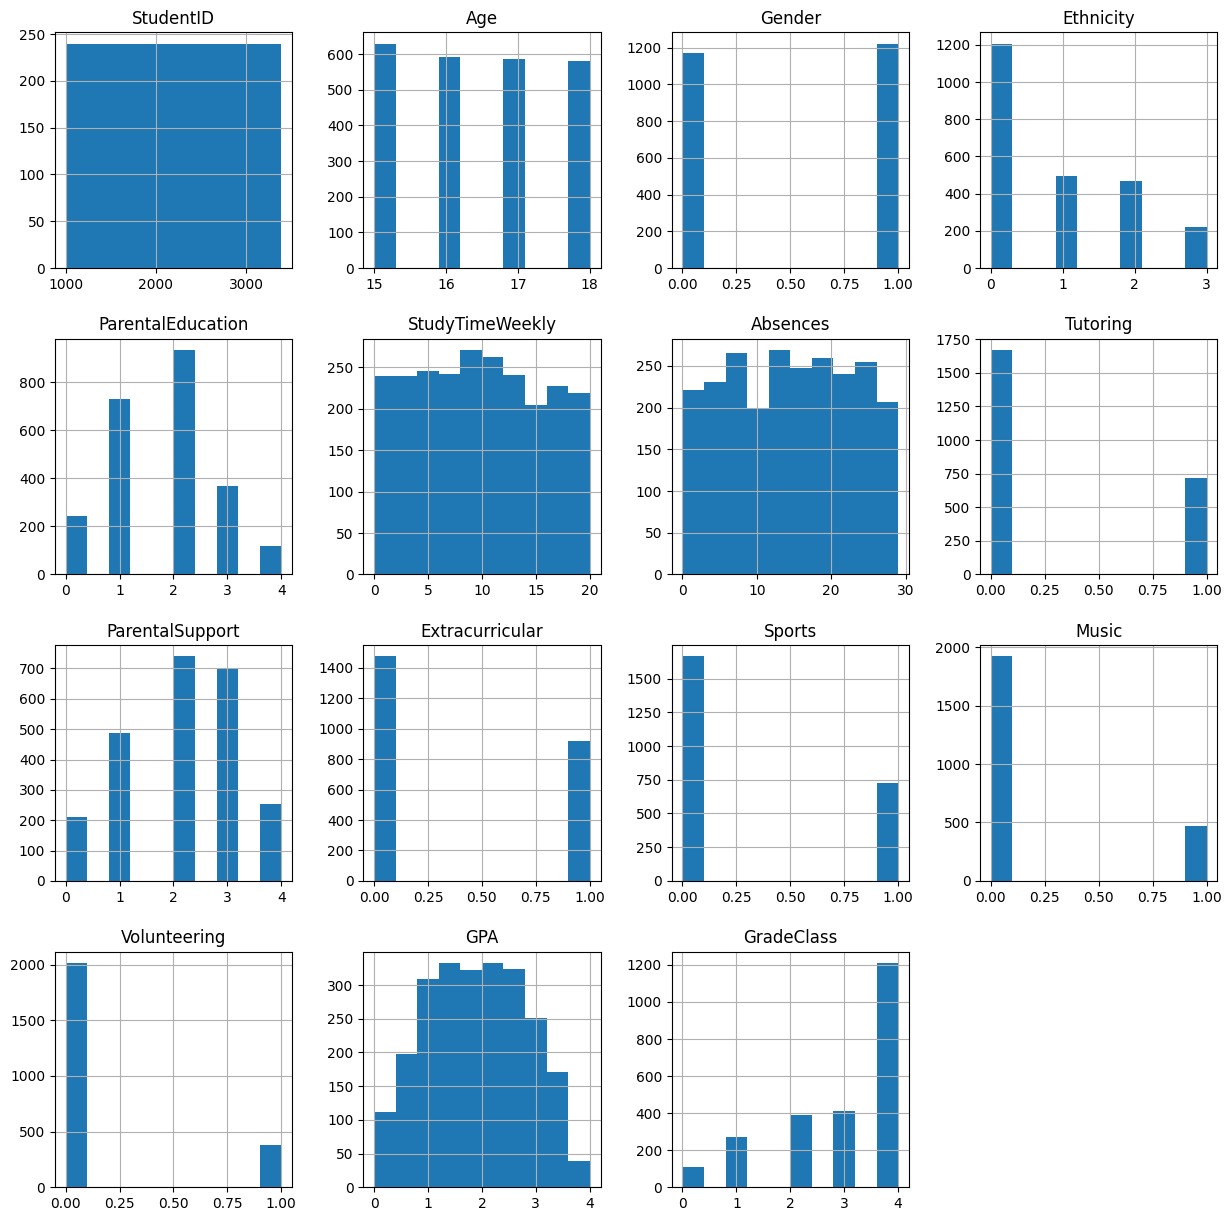

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(15, 15))
sns.boxplot(data=data)

plt.show()



In [5]:
data.groupby('Gender').mean()

,StudentID,Age,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Gender,,,,,,,,,,,,,,
0,2206.820513,16.417094,0.860684,1.739316,9.705749,14.355556,0.316239,2.112821,0.386325,0.307692,0.194017,0.157265,1.918679,2.954701
1,2186.618658,16.518003,0.893617,1.752864,9.835416,14.719313,0.287234,2.130933,0.380524,0.299509,0.199673,0.157119,1.894225,3.011457


In [6]:
def find_outliers(Data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_dict = {}
for column in data.columns:
    outliers = find_outliers(data, column)
    outliers_dict[column] = outliers

for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(outliers)
    print()

for column, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Indices of outliers in {column}: {outliers.index.tolist()}")
    else:
        print(f"No outliers found in {column}")

Outliers in StudentID:
Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []

Outliers in Age:
Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []

Outliers in Gender:
Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []

Outliers in Ethnicity:
Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []

Outliers in ParentalEducation:
      StudentID  Age  Gender  Ethnicity  ParentalEduca

In [ ]:
data.shape

(1552, 15)

In [7]:
outliers_flag = pd.Series(False, index=data.index)

for column in data.columns:
    outliers = find_outliers(data, column)
    outliers_flag |= data.index.isin(outliers.index)

cleandata = data[~outliers_flag]

# Print the shape of the data before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {cleandata.shape}")

Original data shape: (2392, 15)
Data shape after removing outliers: (1552, 15)


In [8]:
y=cleandata['GradeClass']
x=cleandata.drop(['GradeClass', 'StudentID'],axis=1)

In [9]:
y.value_counts()


GradeClass
4.0    777
2.0    267
3.0    266
1.0    167
0.0     75
Name: count, dtype: int64

In [25]:
# split data 30%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Display the results
print("Original X_train:\n", x_train)
print("Scaled X_train:\n", X_train_scaled)
print("Original X_test:\n", x_test)
print("Scaled X_test:\n", X_test_scaled)

Original X_train:
       Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
1018   18       1          0                  1         7.555936        22   
2061   16       1          2                  1         2.010607        25   
473    18       0          1                  2        11.836158        11   
1531   16       0          0                  3        10.064384        28   
845    15       0          3                  0        16.836174        10   
...   ...     ...        ...                ...              ...       ...   
1761   17       0          0                  0        17.870692        25   
2009   15       0          1                  1        14.417864        14   
1325   15       1          0                  3         6.186484        25   
2255   18       0          0                  2         3.777404        13   
1755   18       0          0                  2         4.548435        15   

      Tutoring  ParentalSupport  Extracurric

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200 , random_state=42, max_depth=10,criterion='gini')
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)

Accuracy: 0.8927038626609443


In [29]:
classification_report_result = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.42      0.59        24
         1.0       0.83      0.83      0.83        52
         2.0       0.93      0.85      0.89        92
         3.0       0.76      0.86      0.81        65
         4.0       0.93      0.98      0.96       233

    accuracy                           0.89       466
   macro avg       0.89      0.79      0.81       466
weighted avg       0.90      0.89      0.89       466



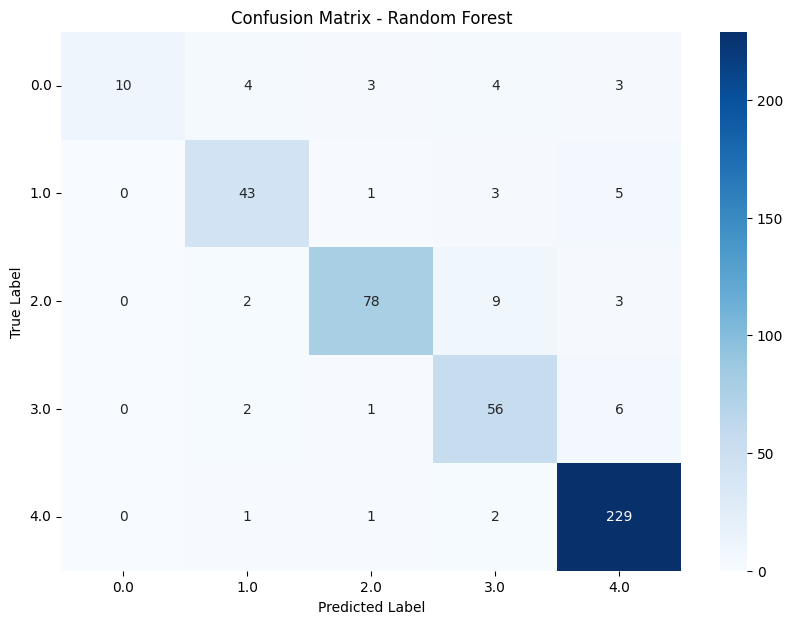

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(len(model.classes_)) + 0.5, labels=model.classes_, rotation=0)
plt.yticks(ticks=np.arange(len(model.classes_)) + 0.5, labels=model.classes_, rotation=0)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.759656652360515
              precision    recall  f1-score   support

         0.0       0.60      0.12      0.21        24
         1.0       0.62      0.50      0.55        52
         2.0       0.65      0.62      0.63        92
         3.0       0.54      0.60      0.57        65
         4.0       0.88      0.98      0.93       233

    accuracy                           0.76       466
   macro avg       0.66      0.57      0.58       466
weighted avg       0.75      0.76      0.74       466



In [32]:
# svm
from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6888412017167382
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        24
         1.0       0.39      0.27      0.32        52
         2.0       0.56      0.58      0.57        92
         3.0       0.43      0.55      0.48        65
         4.0       0.87      0.94      0.90       233

    accuracy                           0.69       466
   macro avg       0.45      0.47      0.45       466
weighted avg       0.65      0.69      0.67       466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
